In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
import missingno as msno

In [3]:
track_features = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/external/track_features/tf_mini.csv")

In [5]:
track_features.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [7]:
track_features.shape

(50704, 30)

In [8]:
track_features.dtypes

track_id                   object
duration                  float64
release_year                int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                       object
organism                  float64
speechiness               float64
tempo                     float64
time_signature              int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_vector_4         float64
acoustic_vector_5         float64
acoustic_vector_6         float64
acoustic_vecto

In [9]:
track_features[track_features.duplicated()]

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7


In [10]:
track_features.isna().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [11]:
track_features.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,...,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,...,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,...,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,...,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,...,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,...,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


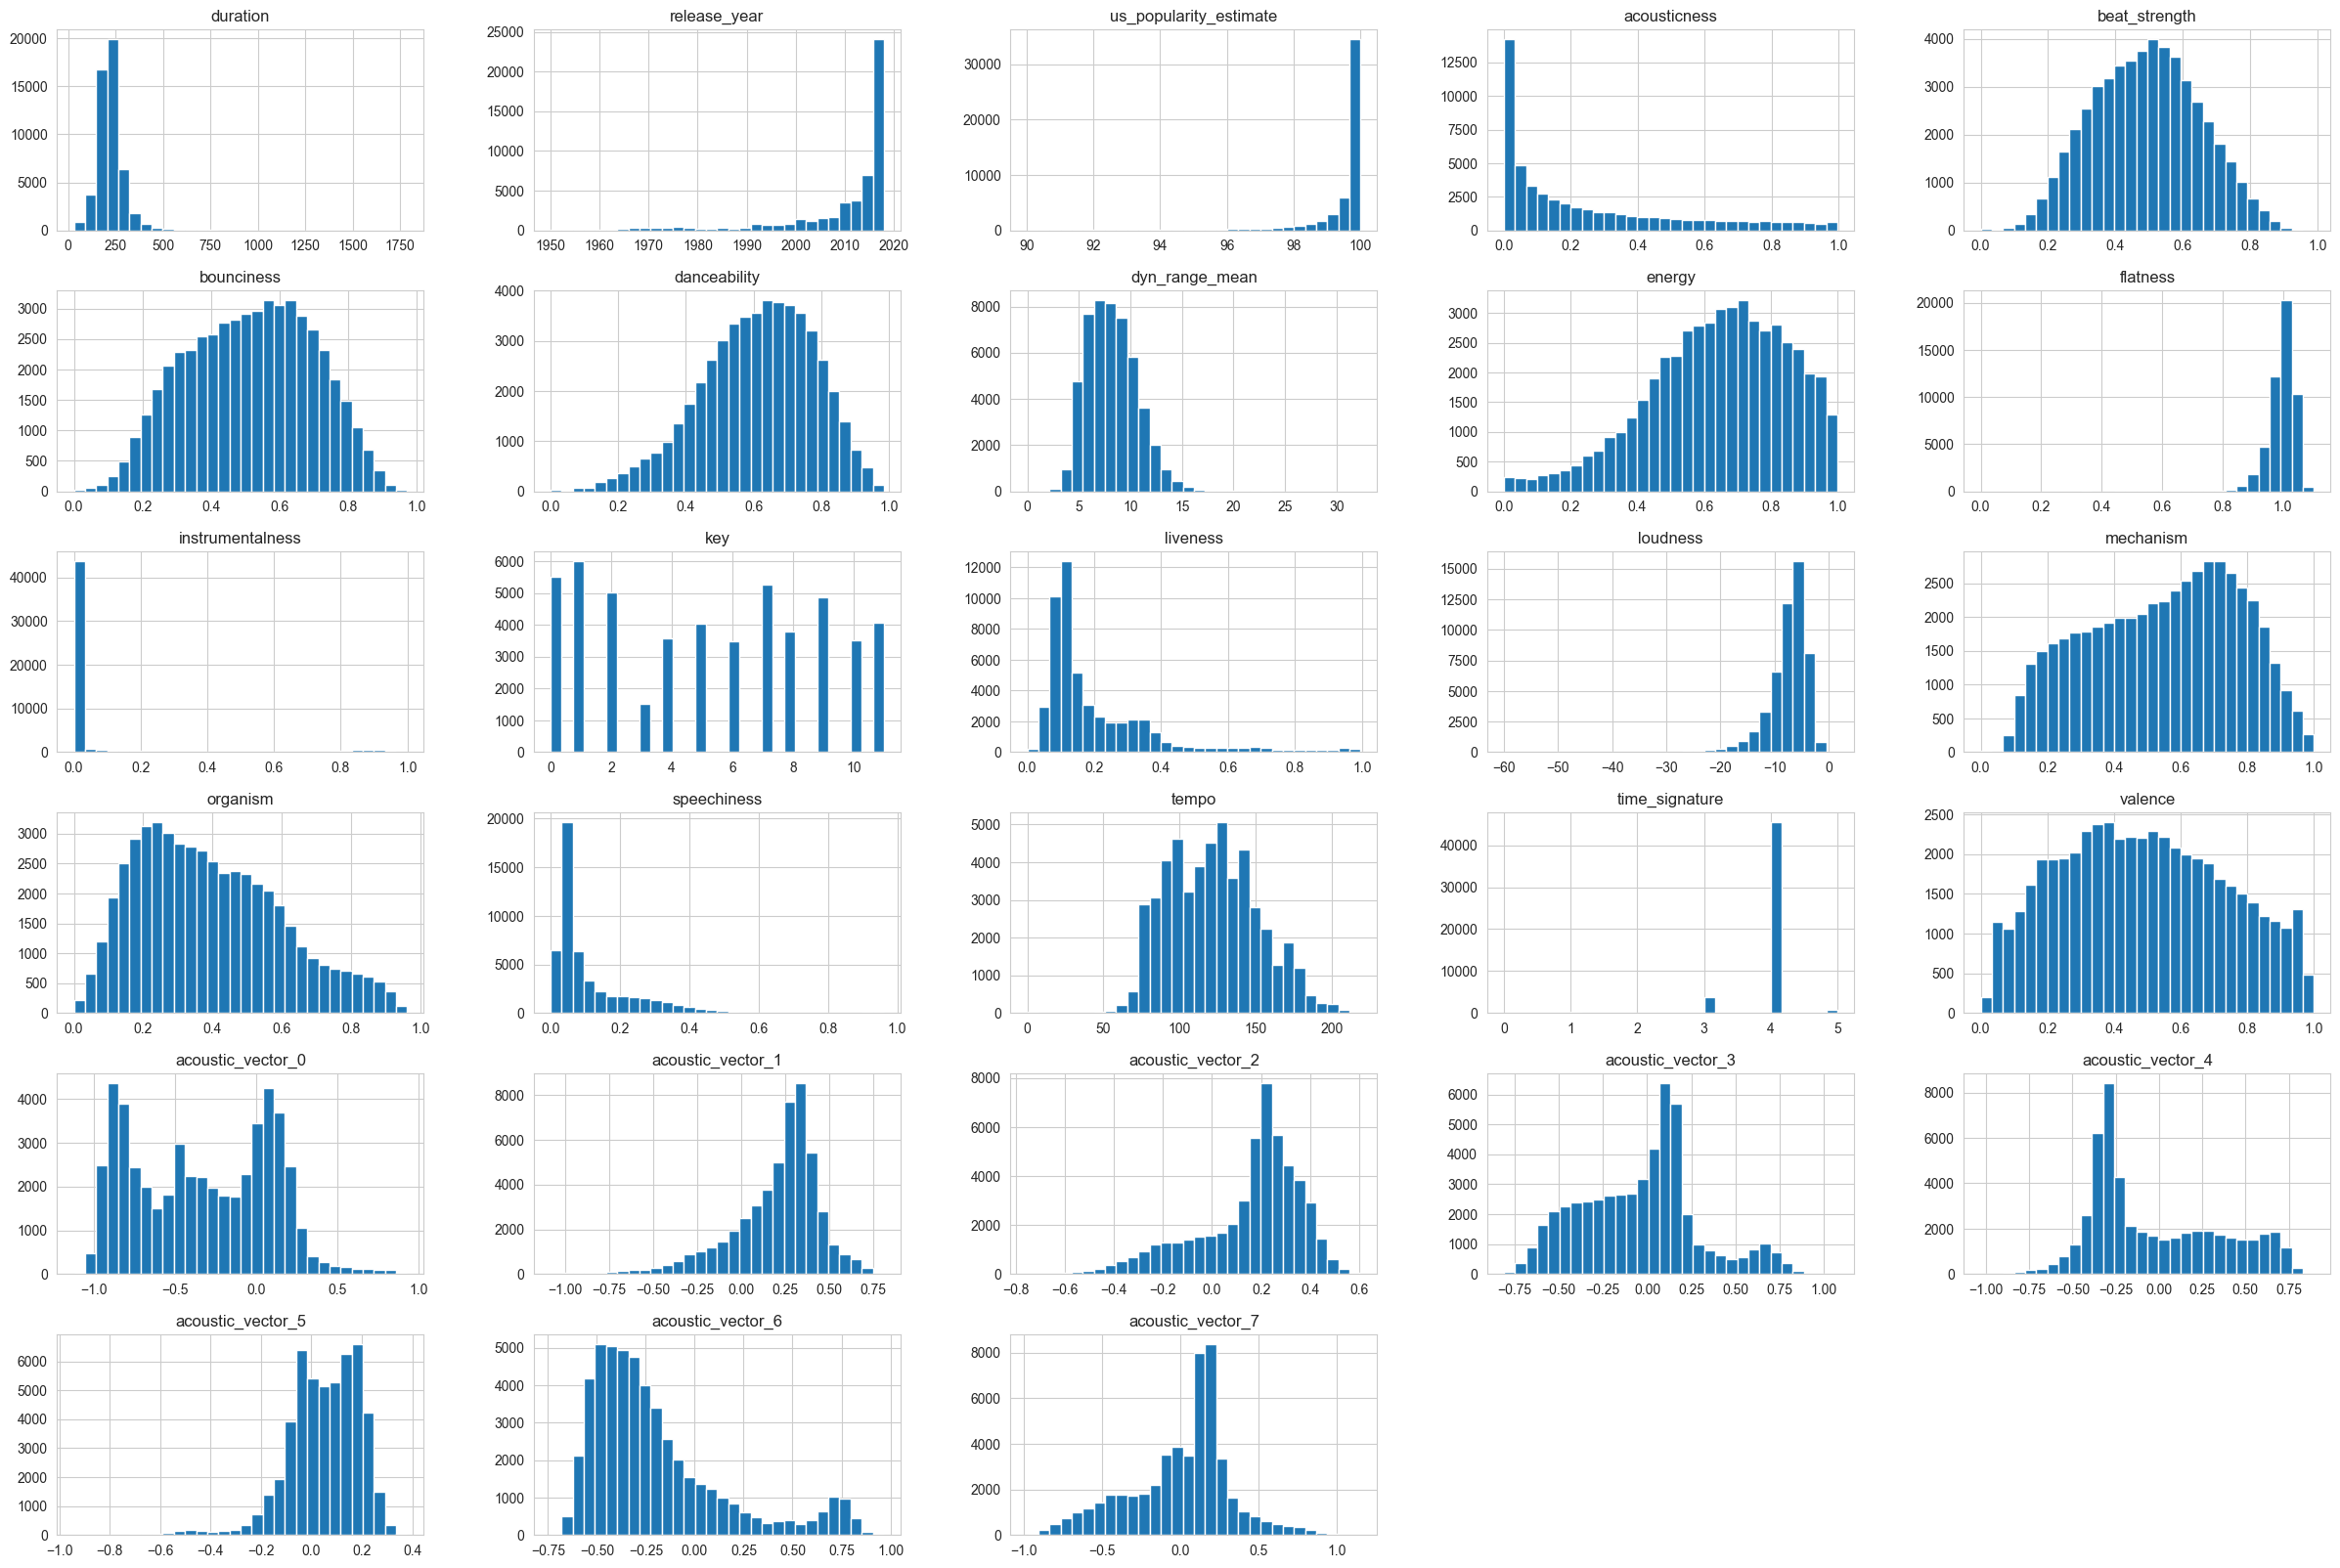

In [14]:
track_features.hist(figsize=(30,20),bins = 30)
plt.title("Features Distribution")
plt.show()

In [7]:
numeric_features = track_features.select_dtypes(include=[np.number])

numeric_features.columns

Index(['duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'organism', 'speechiness', 'tempo', 'time_signature',
       'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object')

In [17]:
categorical_features = track_features.select_dtypes(include=[object])

categorical_features.columns

Index(['track_id', 'mode'], dtype='object')

In [22]:
numeric_features.skew(), numeric_features.kurt()

(duration                  2.714446
 release_year             -2.331317
 us_popularity_estimate   -4.192658
 acousticness              1.093592
 beat_strength             0.031792
 bounciness               -0.094861
 danceability             -0.423328
 dyn_range_mean            0.575882
 energy                   -0.540313
 flatness                 -3.072981
 instrumentalness          3.159186
 key                       0.009987
 liveness                  2.169258
 loudness                 -2.441941
 mechanism                -0.193097
 organism                  0.504132
 speechiness               2.551082
 tempo                     0.265982
 time_signature           -3.931315
 valence                   0.125506
 acoustic_vector_0         0.078814
 acoustic_vector_1        -1.251238
 acoustic_vector_2        -0.991538
 acoustic_vector_3         0.233165
 acoustic_vector_4         0.535741
 acoustic_vector_5        -1.134812
 acoustic_vector_6         1.363392
 acoustic_vector_7        -0

/var/folders/t7/mc9xrfld1mb9_gqcpt1_s78h0000gn/T/ipykernel_5353/540239638.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
/var/folders/t7/mc9xrfld1mb9_gqcpt1_s78h0000gn/T/ipykernel_5353/540239638.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False

<AxesSubplot:title={'center':'Log Normal'}, xlabel='instrumentalness'>

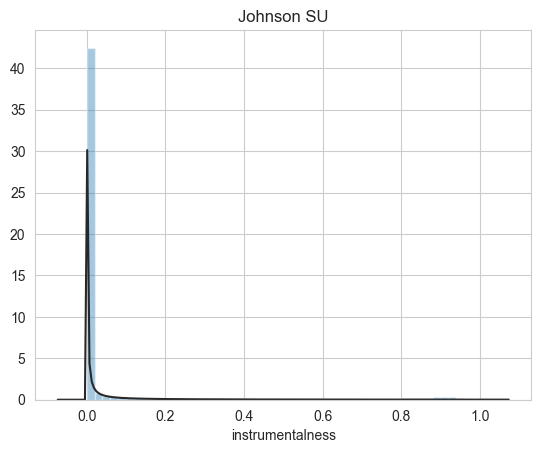

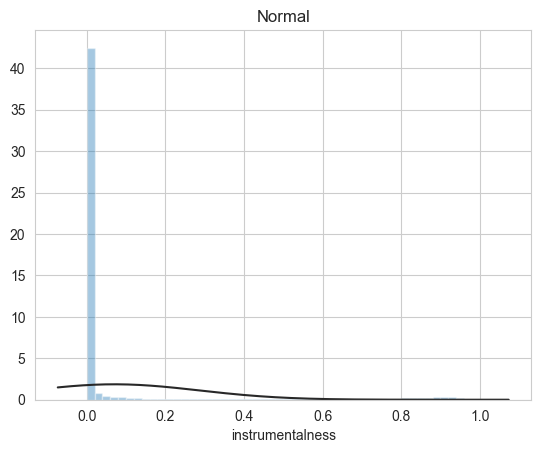

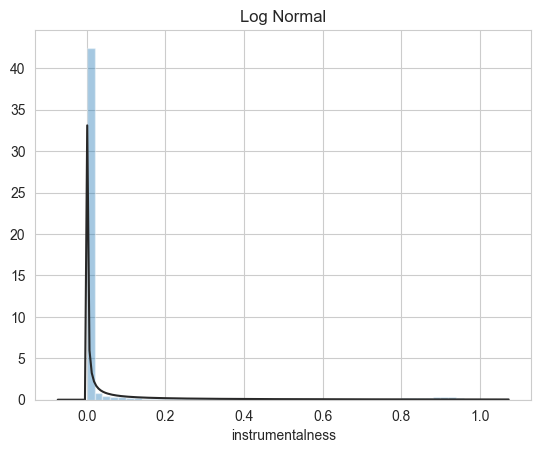

In [4]:
y = track_features['instrumentalness']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

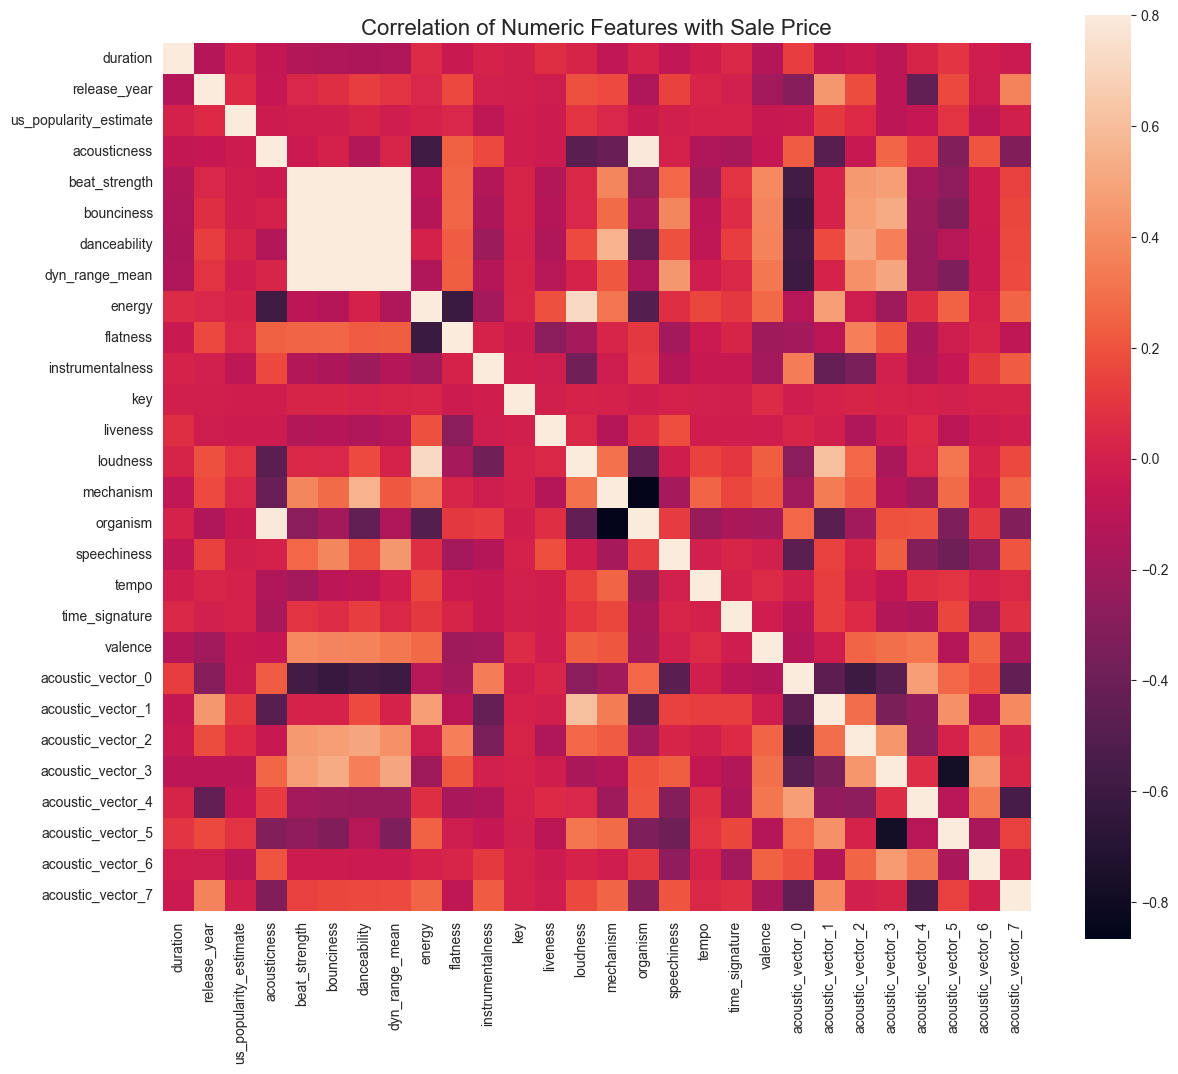

In [25]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

correlation = numeric_features.corr()
sns.heatmap(correlation,square = True,  vmax=0.8)

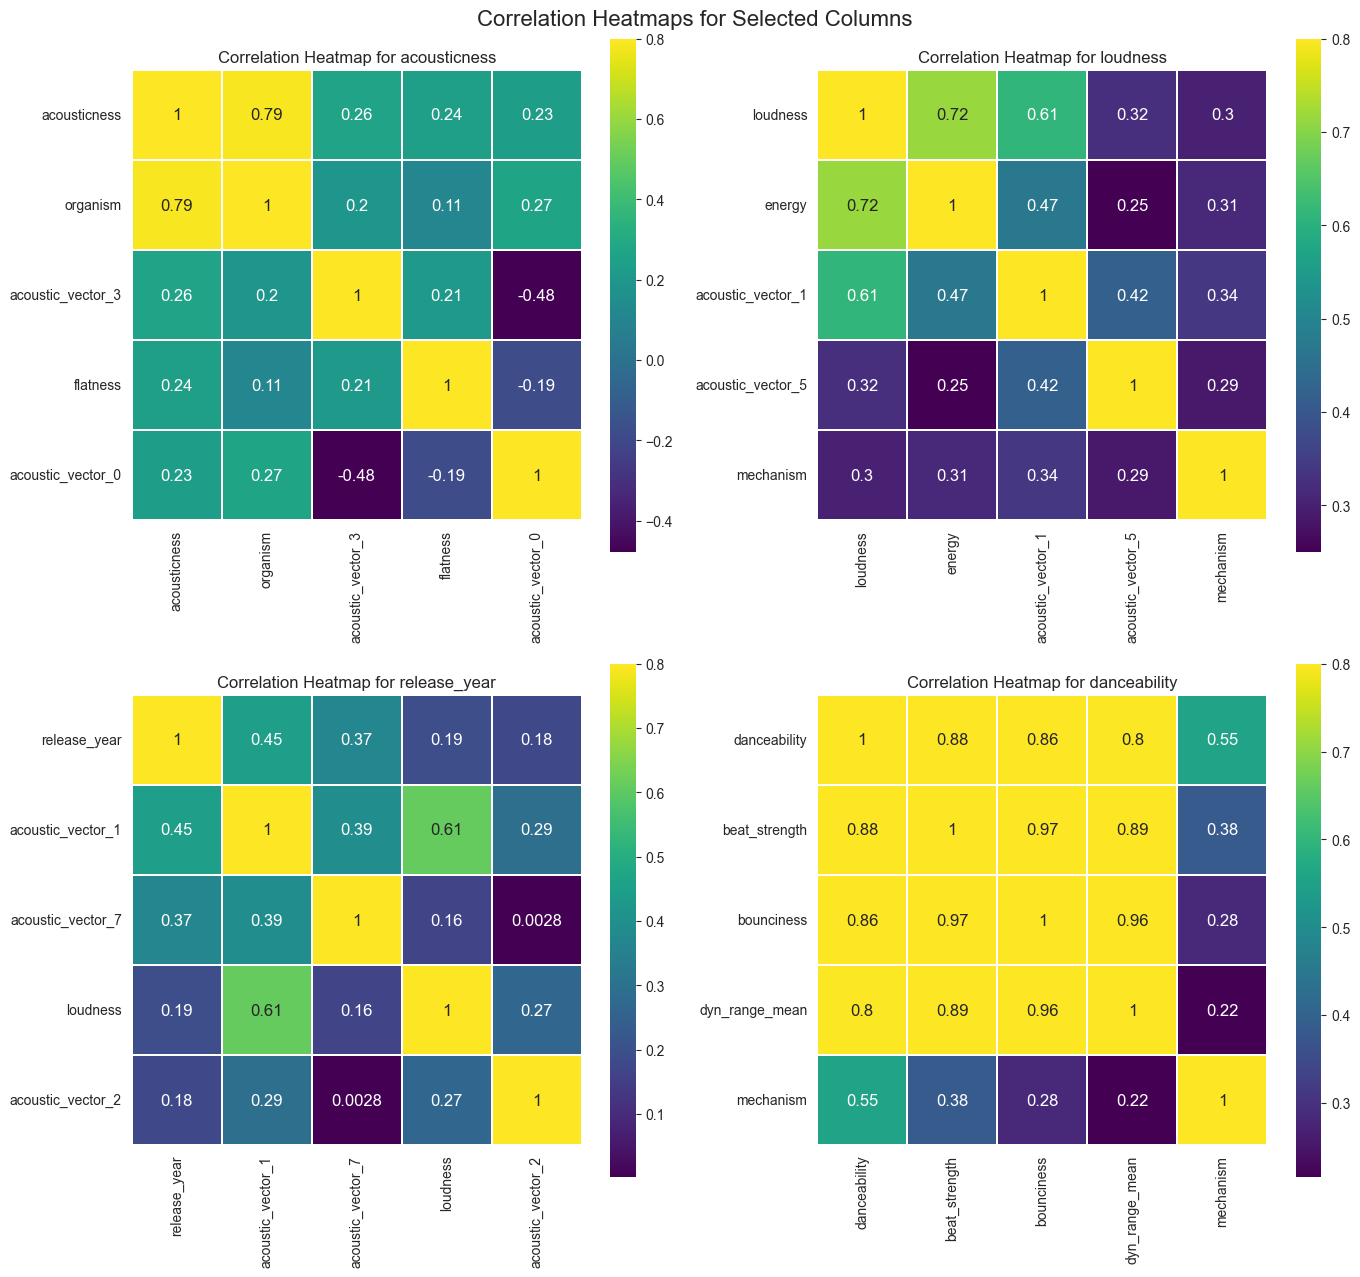

In [38]:
# Define the columns you want to analyze
columns_to_analyze = ['acousticness', 'loudness', 'release_year', 'danceability']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 13))
fig.suptitle('Correlation Heatmaps for Selected Columns', fontsize=16)

for i, column in enumerate(columns_to_analyze):
    row = i // 2
    col = i % 2

    # Get the top correlated columns for the current column
    k = 5
    cols = correlation.nlargest(k, column)[column].index
    cm = np.corrcoef(track_features[cols].values.T)

    # Create a heatmap in the current subplot
    sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
                linecolor="white", xticklabels=cols.values, annot_kws={'size': 12},
                yticklabels=cols.values, ax=axs[row, col])
    
    axs[row, col].set_title(f'Correlation Heatmap for {column}', fontsize=12)
    axs[row, col].label_outer()

# Adjust subplot layout
plt.tight_layout()
plt.show()


/Library/Python/3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


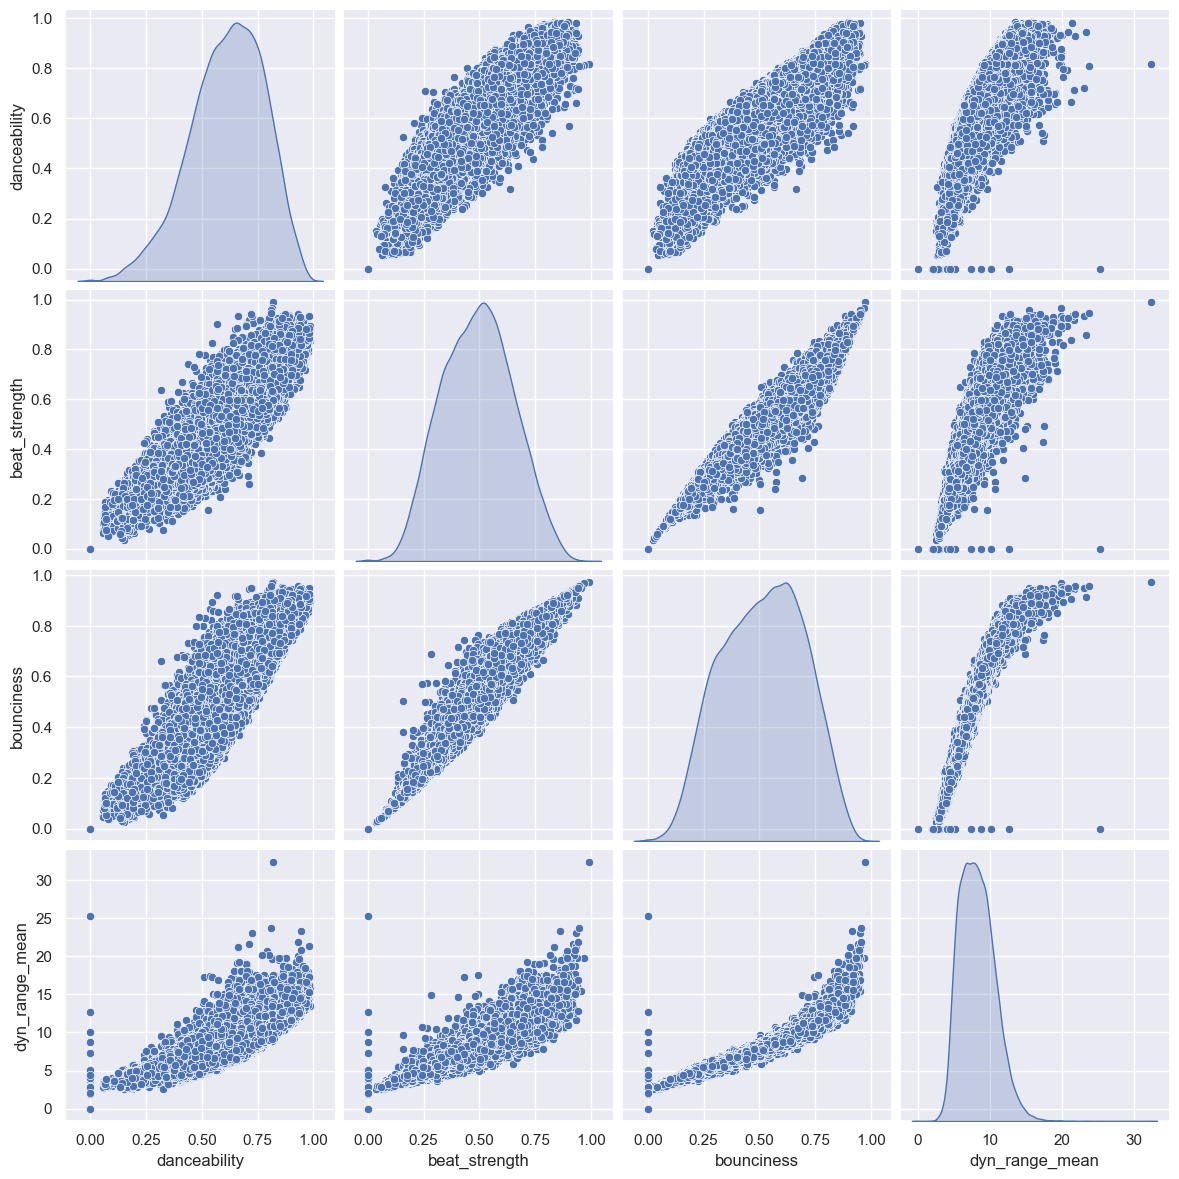

In [12]:
sns.set()
columns = ['danceability','beat_strength','bounciness','dyn_range_mean',]
sns.pairplot(track_features[columns],size = 3 ,kind ='scatter',diag_kind='kde')
plt.show()